##Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [ ]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math

In [ ]:
google = pd.read_csv('GOOGL.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
google.tail()

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,1.016136
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,1.005916
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,1.029186
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700,0.989638
2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900,1.014546


##Step - 2 : Plotting the raw data

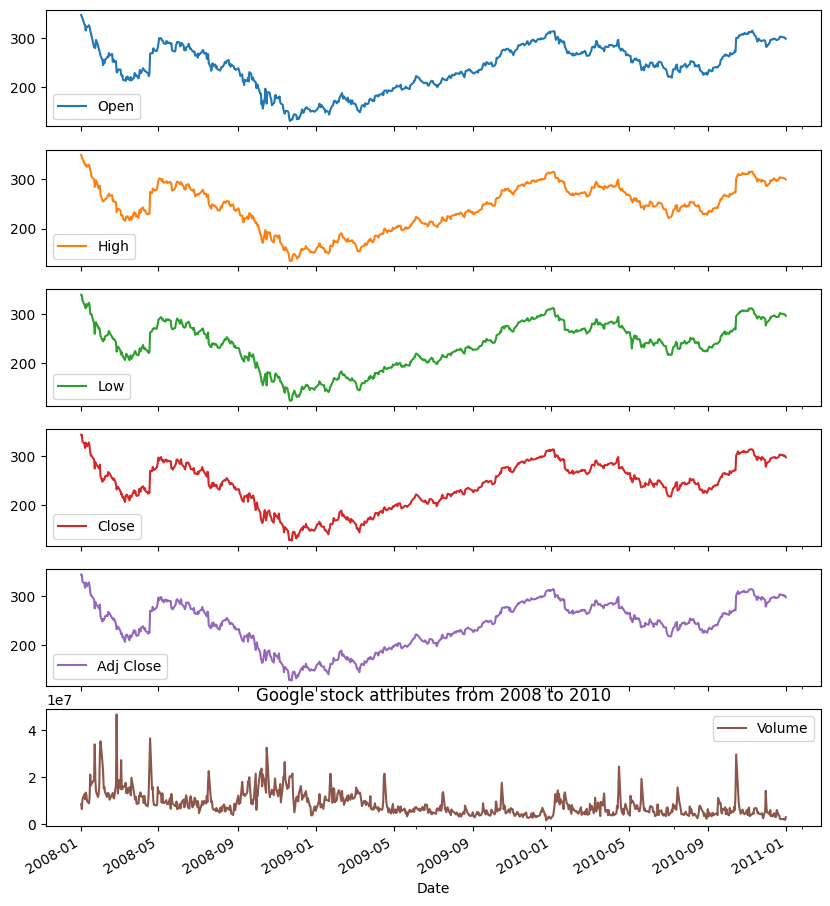

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

##Finance and statistics

Percent change

<Axes: xlabel='Date'>

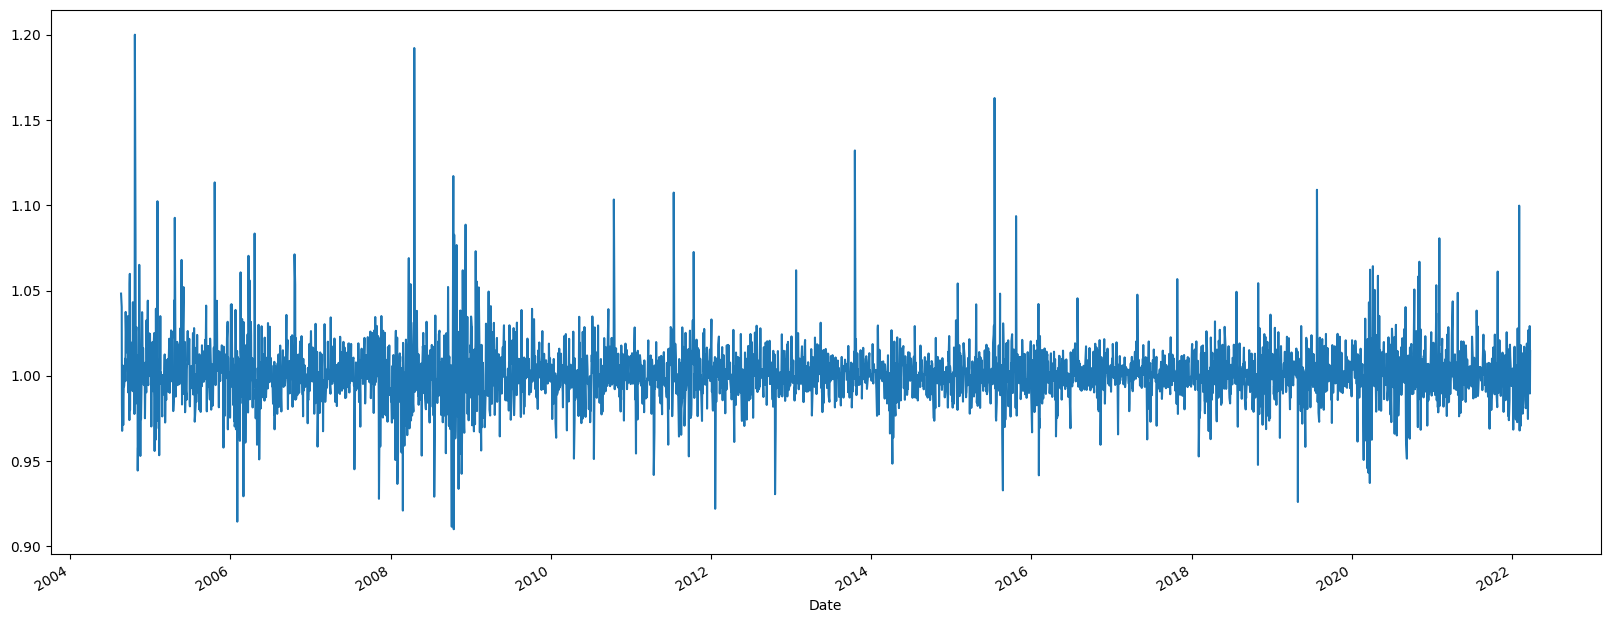

In [ ]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

Stock returns

<Axes: xlabel='Date'>

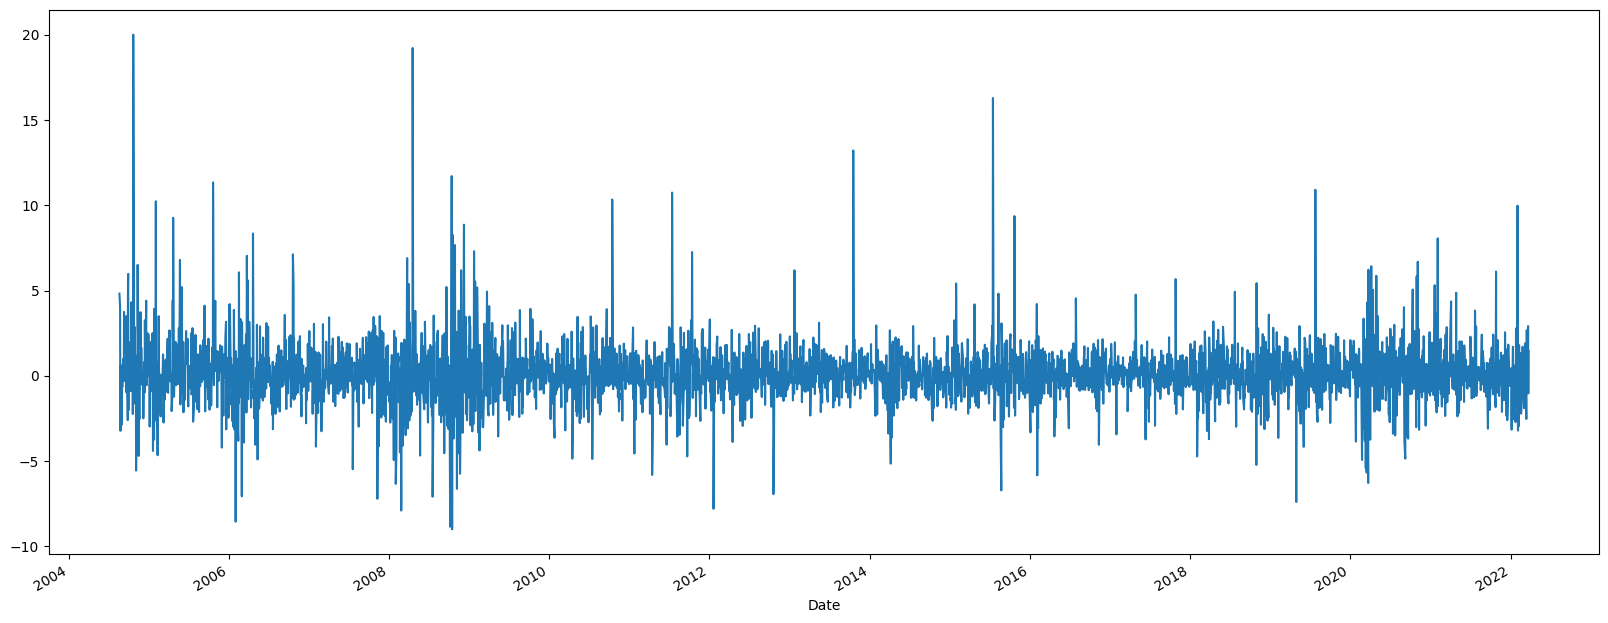

In [ ]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

Absolute change in successive rows

<Axes: xlabel='Date'>

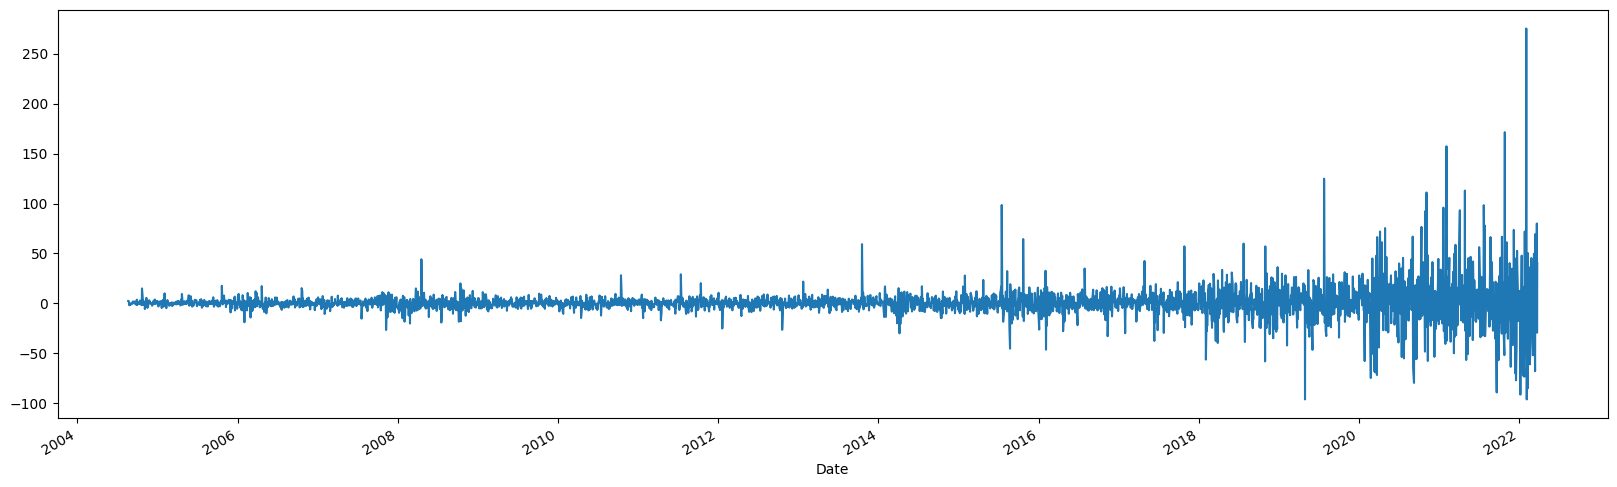

In [ ]:
google.High.diff().plot(figsize=(20,6))


 Comparing two or more time series

In [ ]:
microsoft = pd.read_csv('MSFT.csv', index_col='Date', parse_dates=['Date'])

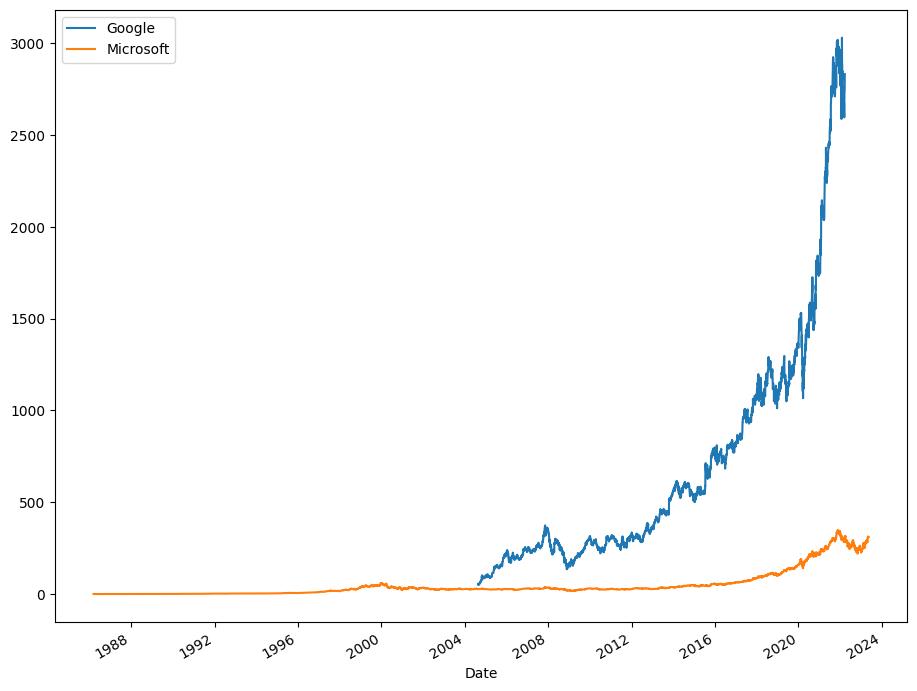

In [ ]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

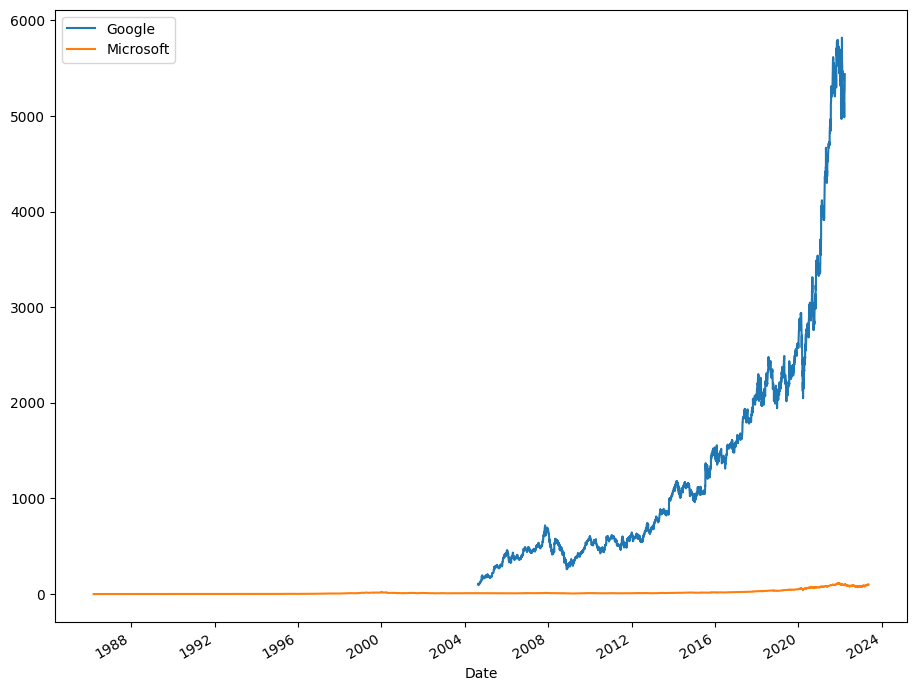

In [ ]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

Google outperforms microsoft over time.

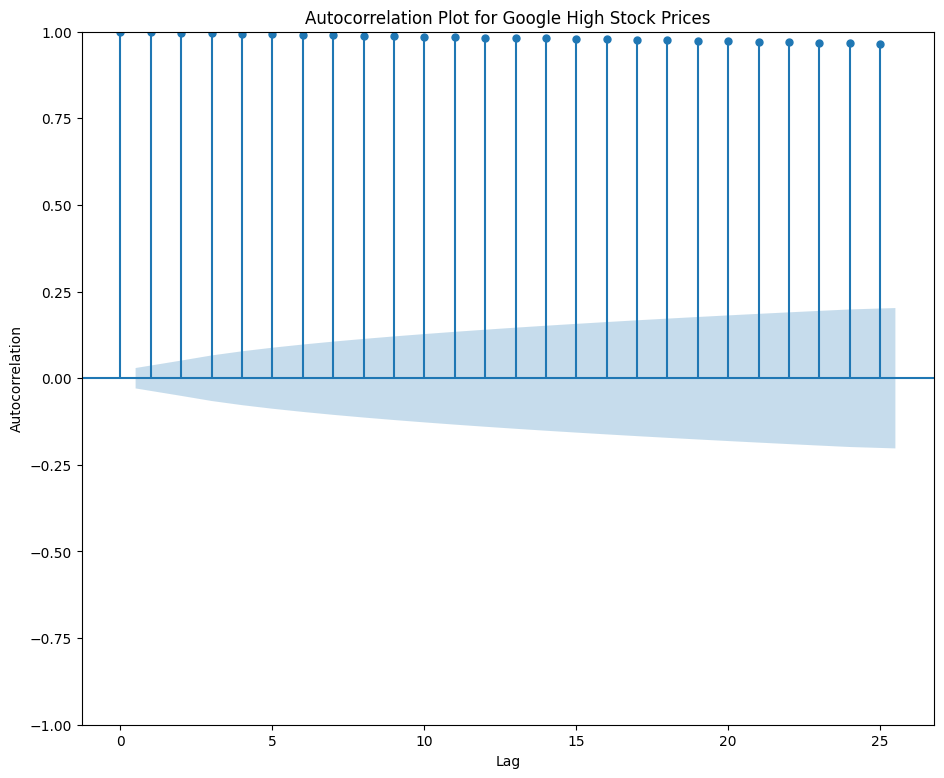

In [ ]:
plot_acf(google['High'], lags=25)
plt.title('Autocorrelation Plot for Google High Stock Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

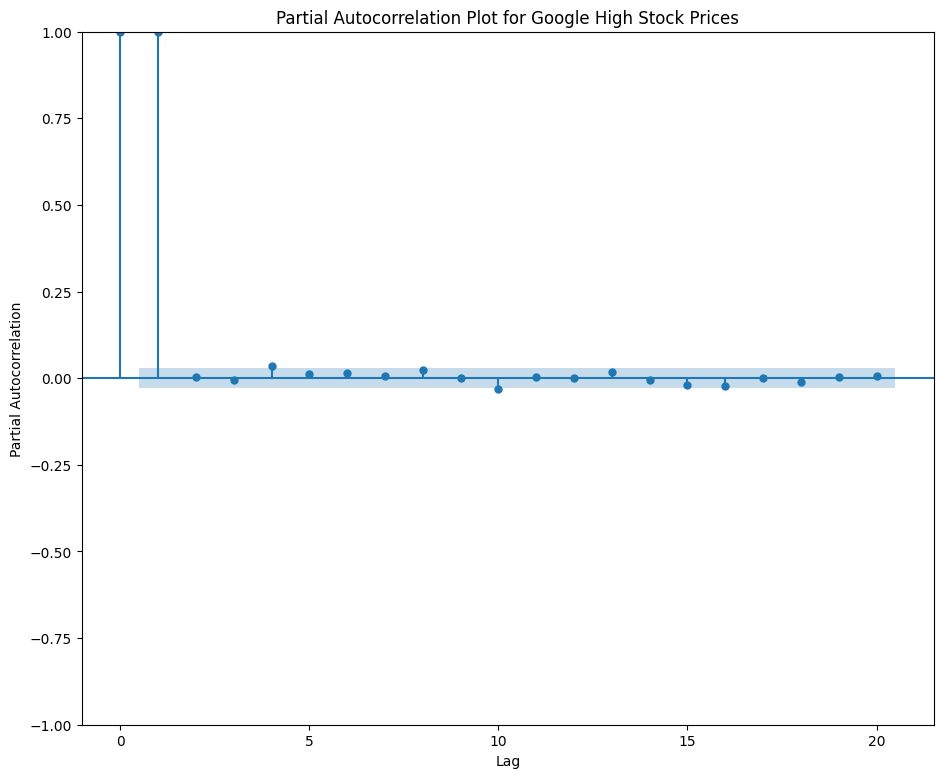

In [ ]:
# Partial autocorrelation plot
plot_pacf(google['High'], lags=20)
plt.title('Partial Autocorrelation Plot for Google High Stock Prices')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

##Time series decomposition and Random walks

Trends, seasonality and noise

These are the components of a time series



**Trend**

Consistent upwards or downwards slope of a time series

**Seasonality**

Clear periodic pattern of a time series(like sine funtion)

**Noise**

Outliers or missing values



<Axes: xlabel='Date'>

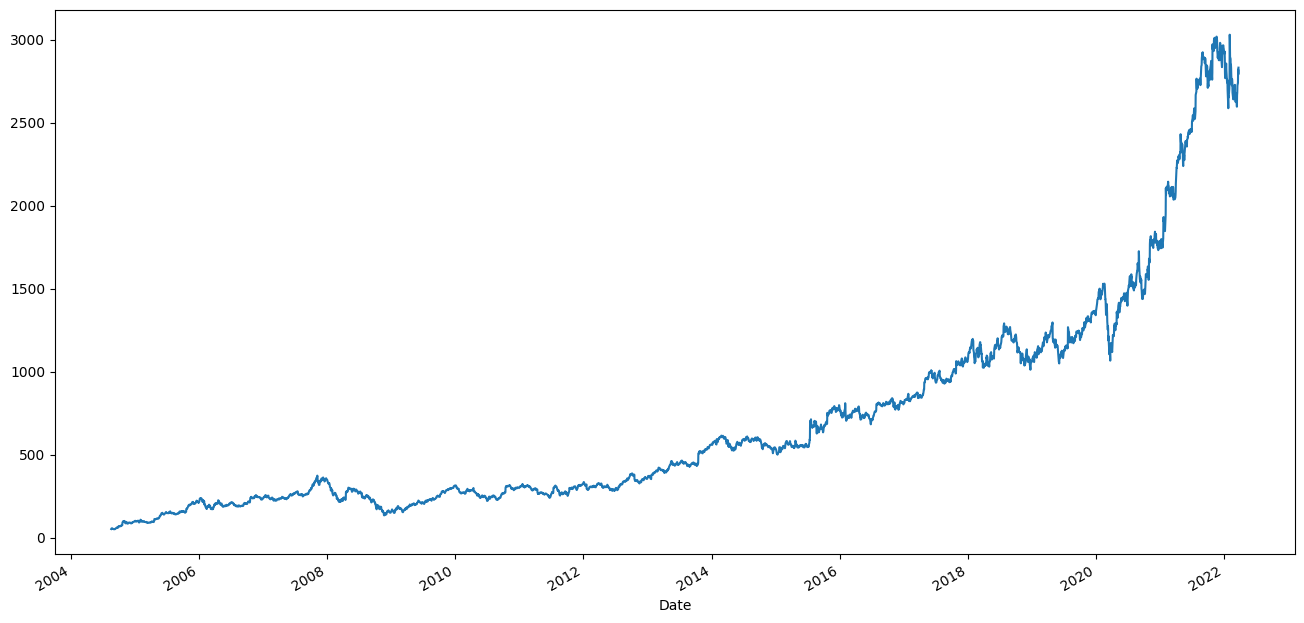

In [ ]:
google["High"].plot(figsize=(16,8))

In [ ]:
!pip install chart-studio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

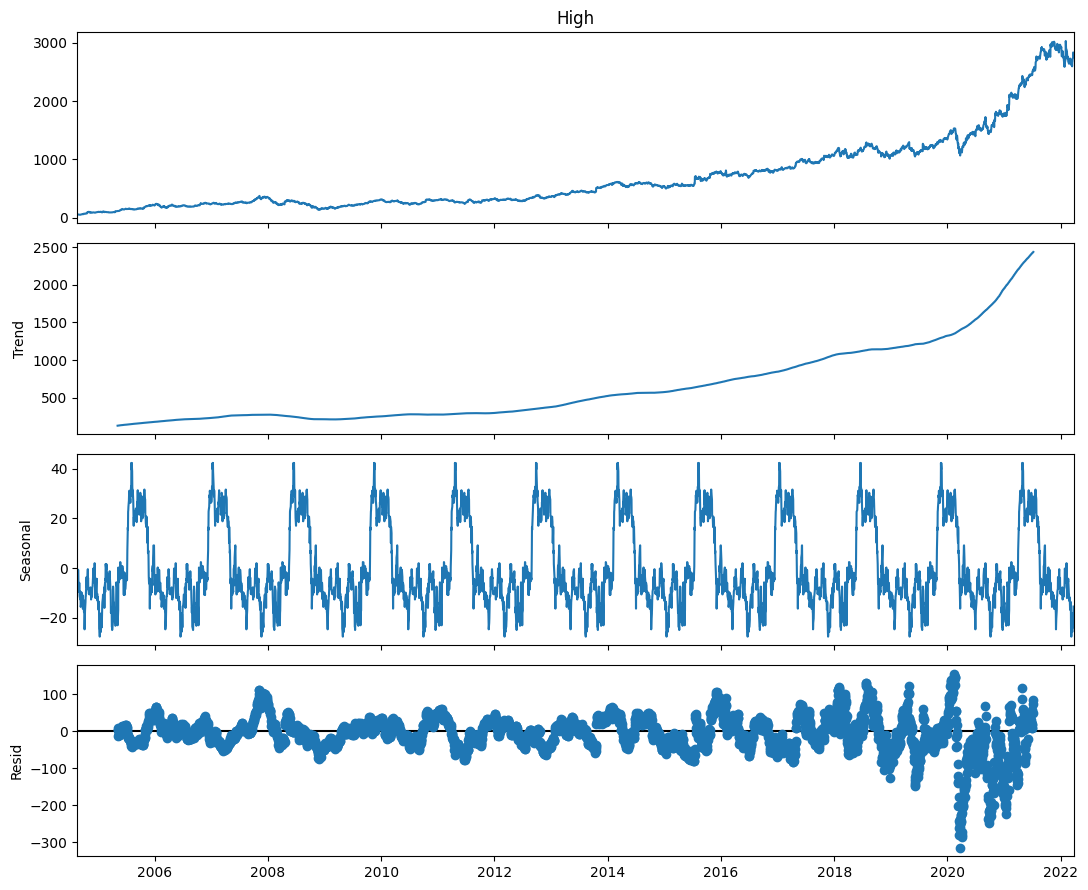

In [ ]:
# Now, for decomposition...

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"], period=360)  # Specify the period instead of freq
figure = decomposed_google_volume.plot()
plt.show()

**White noise**

White noise has...

Constant Mean

Constant variance

Zero auto-correlation at all lags

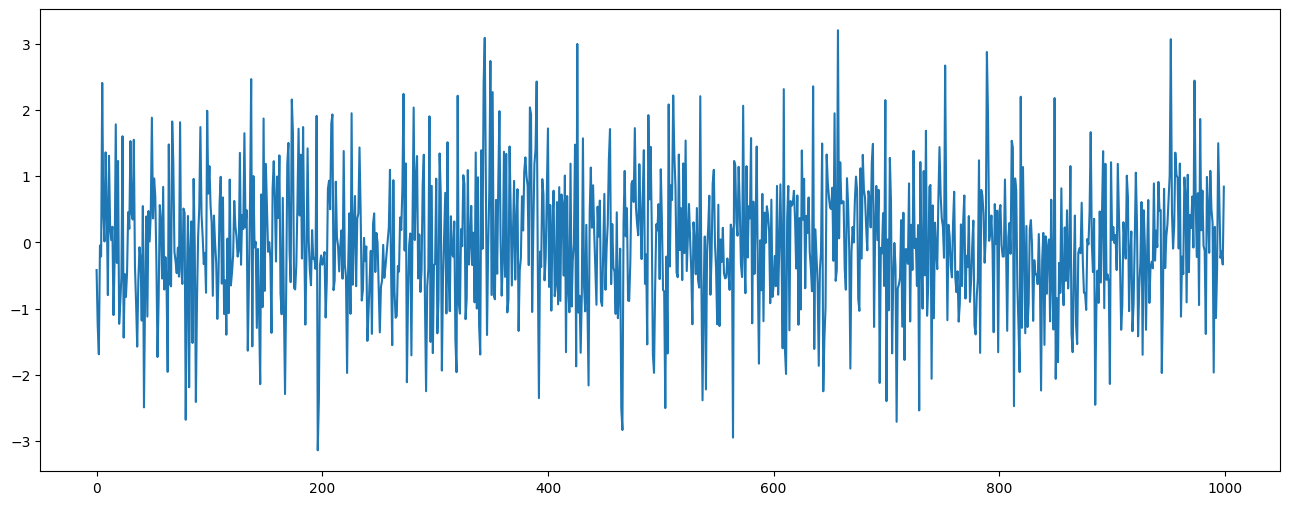

In [ ]:

# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

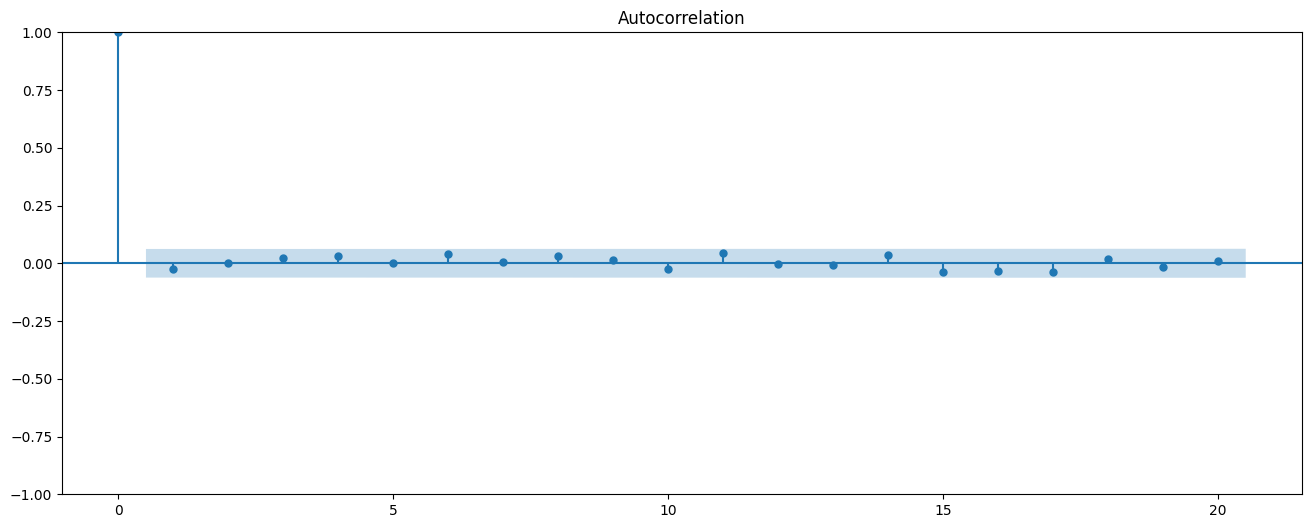

In [ ]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

##Random Walk

**Augmented Dickey-Fuller test**

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RH

In [ ]:
#Augmented Dickey-Fuller test on volume of google and microsoft stocks
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 2.9188428144614903e-10
p-value of google: 0.004161275999300983


For Microsoft stock volume: The p-value obtained from the ADF test is approximately 2.92e-10, which is significantly less than the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that the volume of Microsoft stock is stationary.

For Google stock volume: The p-value obtained from the ADF test is approximately 0.00416, which is less than the significance level of 0.05. Similar to Microsoft, we reject the null hypothesis and conclude that the volume of Google stock is stationary.

In summary, the ADF test results suggest that both the volume of Microsoft and Google stocks are stationary, indicating that they exhibit consistent statistical properties over time.

##Stationarity

**Strong stationarity:**

This is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.

**Weak stationarity:**

This is a process where mean, variance, autocorrelation are constant throughout the time

<Axes: xlabel='Date'>

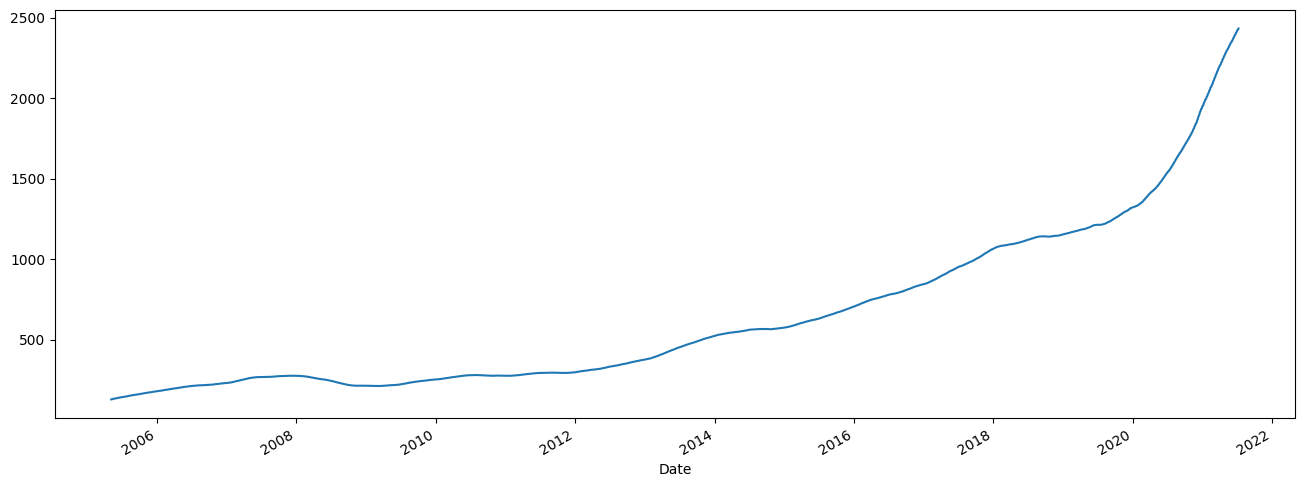

In [ ]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

<Axes: xlabel='Date'>

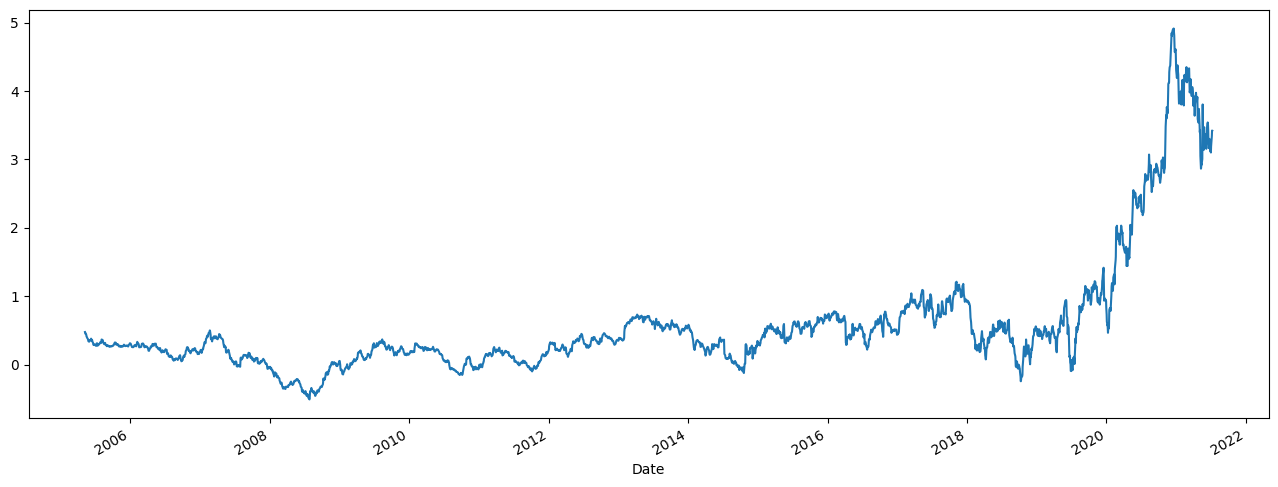

In [ ]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

##Modelling using statstools

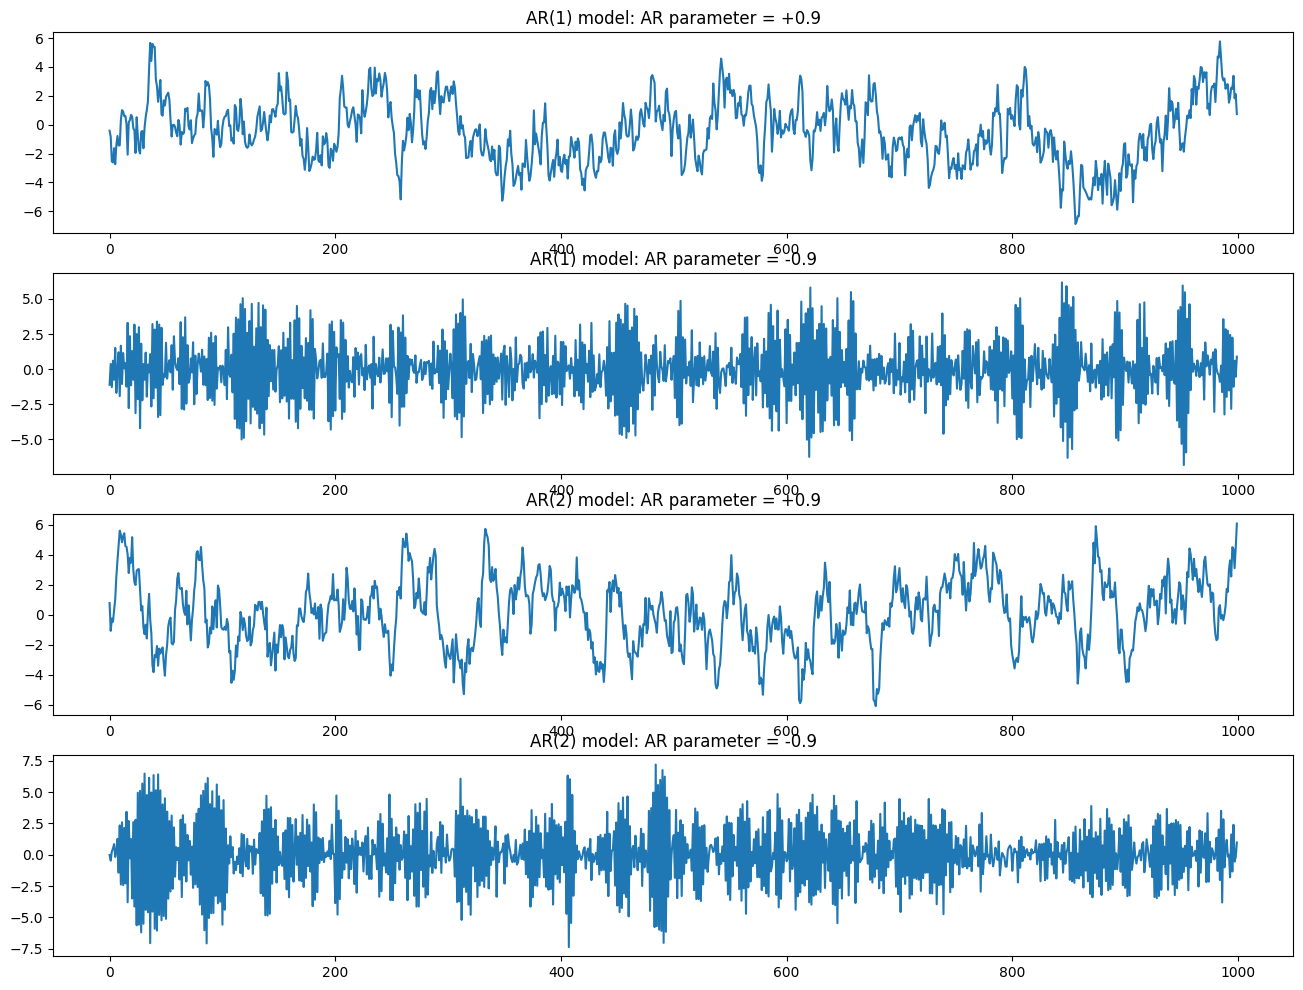

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# AR(1) model with AR parameter = +0.9
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9])  # AR parameter = +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

# AR(1) model with AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9])  # AR parameter = -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)

# AR(2) model with AR parameter = +0.9
plt.subplot(4,1,3)
ar3 = np.array([1, -0.9])  # AR parameter = +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)

# AR(2) model with AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([1, 0.9])  # AR parameter = -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)

plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you've determined differencing order (d) is 0
model = ARIMA(sim1, order=(1, 0, 0))  # (AR order, differencing order, MA order)
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0], result.params[1]))


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1425.796
Date:                Sun, 31 Mar 2024   AIC                           2857.593
Time:                        12:52:20   BIC                           2872.316
Sample:                             0   HQIC                          2863.189
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4647      0.270     -1.724      0.085      -0.993       0.064
ar.L1          0.8817      0.015     58.903      0.000       0.852       0.911
sigma2         1.0123      0.045     22.620      0.0

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

##Predicting the models

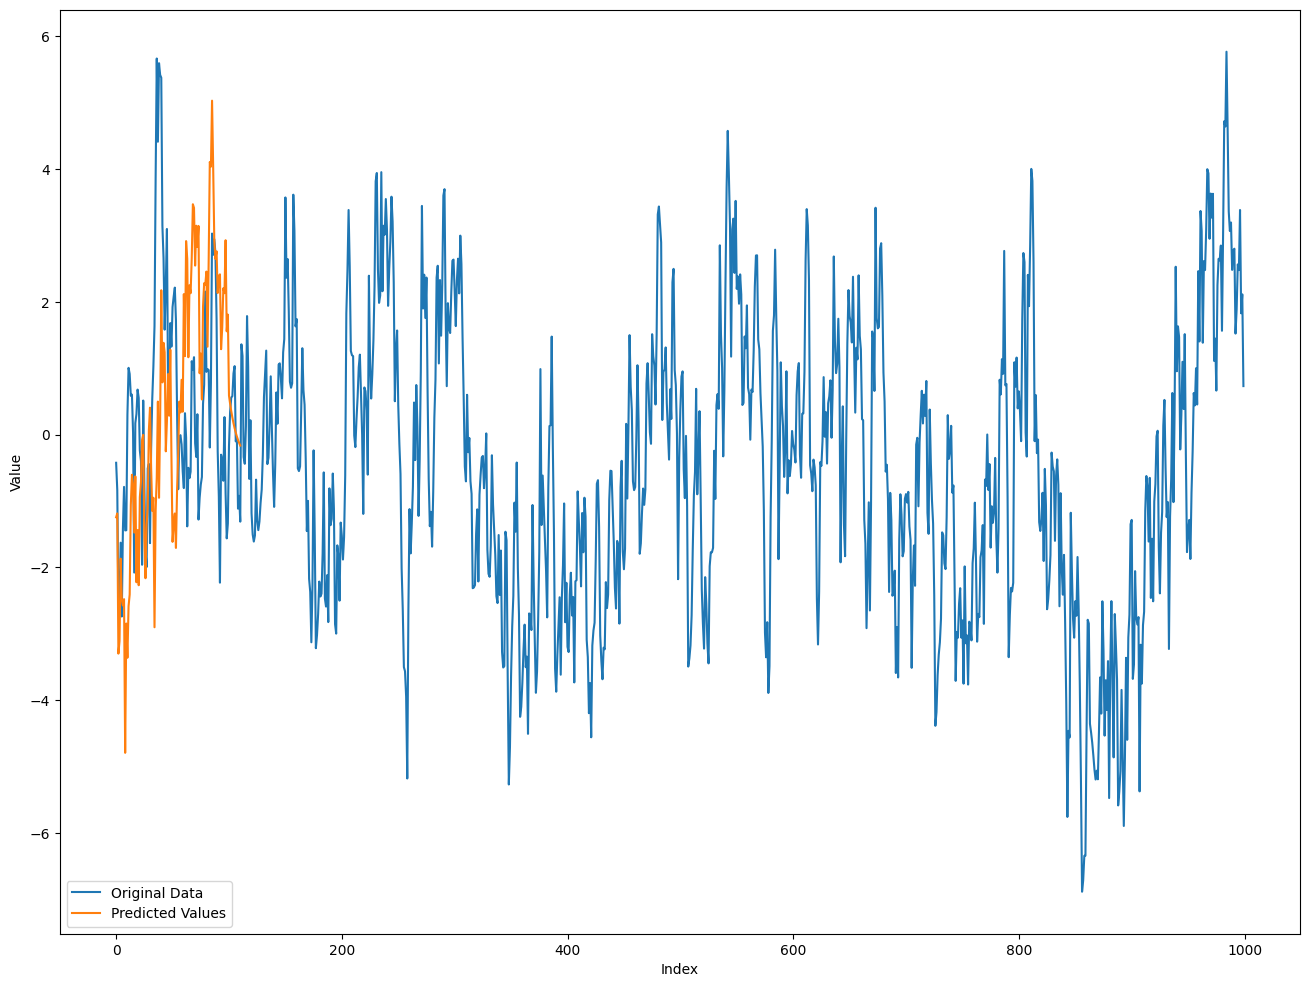

In [ ]:
# Get the predicted values
predicted_values = result.predict(start=900, end=1010)

# Plot the original data
plt.plot(sim1, label='Original Data')

# Plot the predicted values
plt.plot(predicted_values, label='Predicted Values')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


In [ ]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408056511726917.


y is predicted plot

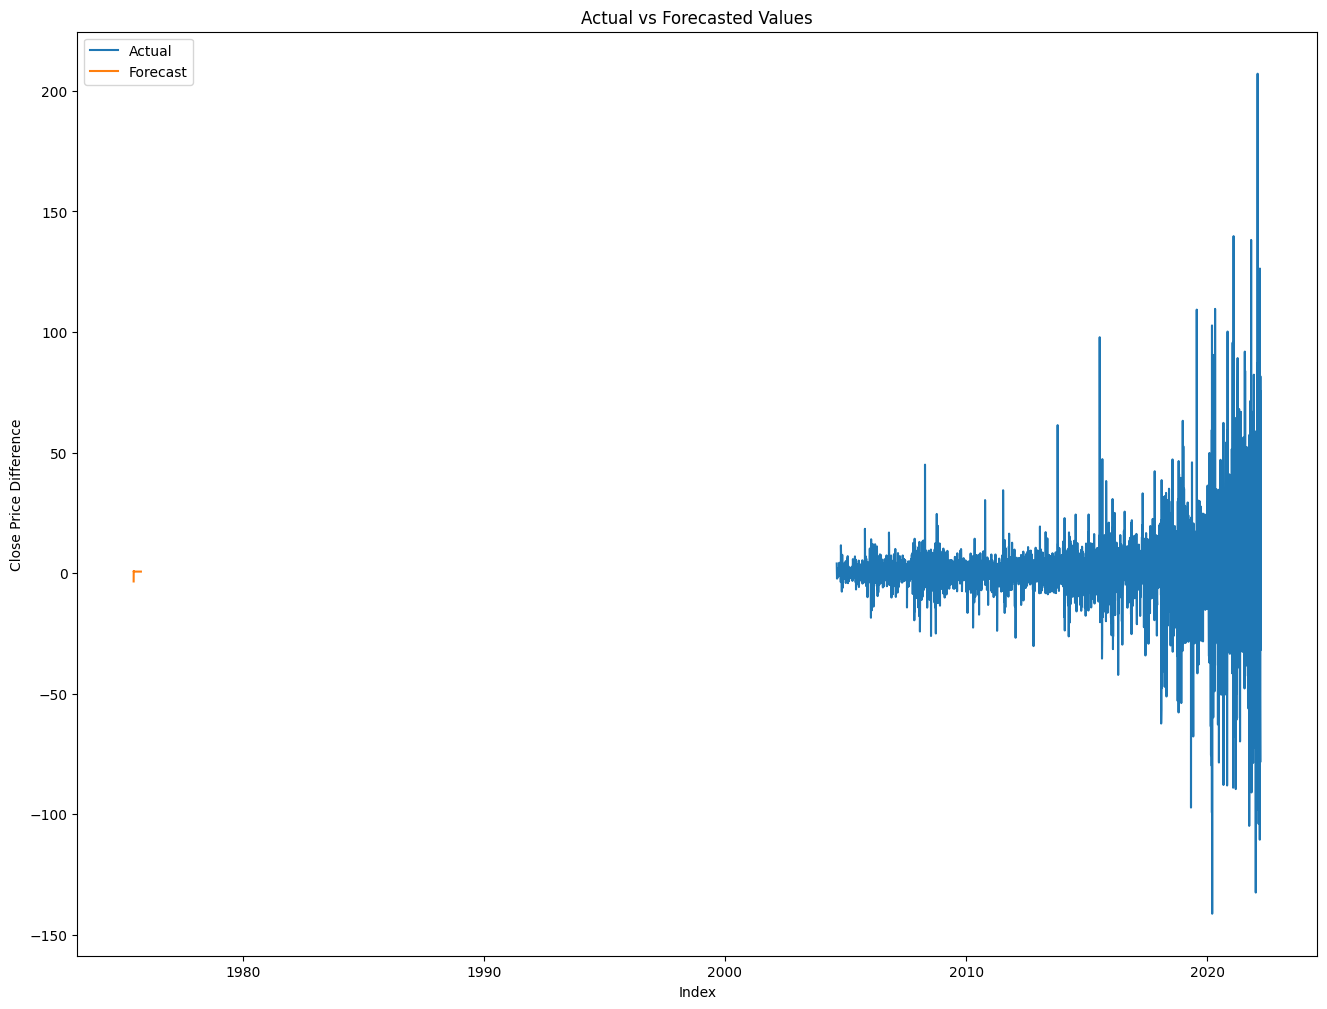

In [ ]:
# Generate forecasts for indices greater than 2000
forecast_values = res.forecast(steps=111)



# Plot the actual data
plt.plot(google["Close"].diff().iloc[1:], label='Actual')

# Plot the forecasted values
plt.plot(index_range, forecast_values, label='Forecast')

# Set plot labels and legend
plt.xlabel('Index')
plt.ylabel('Close Price Difference')
plt.title('Actual vs Forecasted Values')
plt.legend()

# Show the plot
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1388.429
Date:                Sun, 31 Mar 2024   AIC                           2782.859
Time:                        13:03:58   BIC                           2797.582
Sample:                             0   HQIC                          2788.455
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0197      0.015     -1.304      0.192      -0.049       0.010
ma.L1         -0.5090      0.028    -18.417      0.000      -0.563      -0.455
sigma2         0.9405      0.042     22.160      0.0

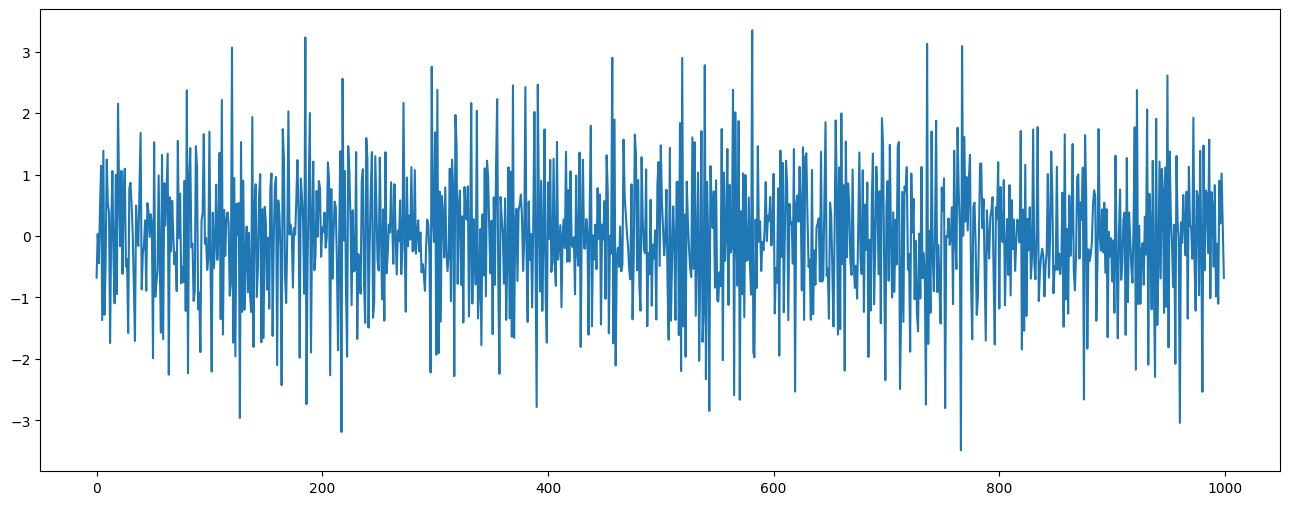

In [ ]:
# Set figure size
rcParams['figure.figsize'] = 16, 6

# Define the AR and MA parameters
ar1 = np.array([1])
ma1 = np.array([1, -0.5])

# Generate a sample using the ARMA process
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)

# Plot the simulated data
plt.plot(sim1)

# Fit an ARMA model with zero AR terms and one MA term
model = ARIMA(sim1, order=(0,0,1))
result = model.fit()

# Print the summary of the model
print(result.summary())

# Print the estimated parameters
print("μ={} ,θ={}".format(result.params[0], result.params[1]))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Forecasted values: 4431    2332.720189
4432     693.139970
4433     693.139970
4434     693.139970
4435     693.139970
4436     693.139970
4437     693.139970
4438     693.139970
4439     693.139970
4440     693.139970
4441     693.139970
4442     693.139970
4443     693.139970
4444     693.139970
4445     693.139970
4446     693.139970
4447     693.139970
4448     693.139970
4449     693.139970
4450     693.139970
4451     693.139970
4452     693.139970
4453     693.139970
4454     693.139970
4455     693.139970
4456     693.139970
4457     693.139970
4458     693.139970
4459     693.139970
4460     693.139970
Name: predicted_mean, dtype: float64


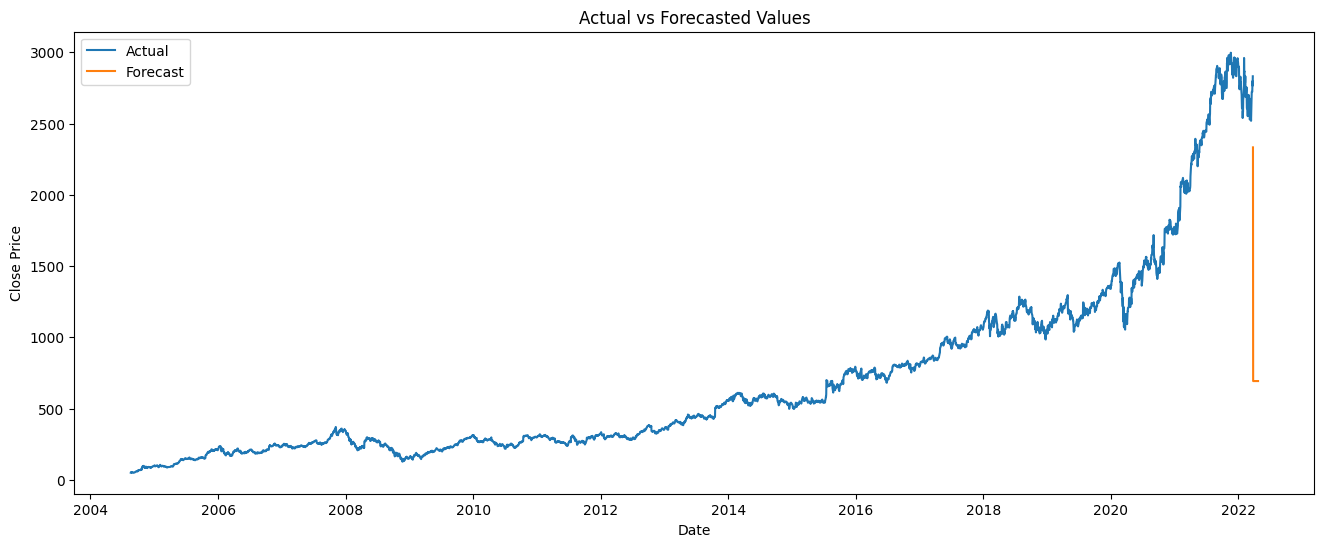

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA model to the historical data
order = (0, 0, 1)  # MA model with 1 MA term
ma_model = ARIMA(google["Close"], order=order)
ma_result = ma_model.fit()

# Generate forecasts for future time steps
forecast_steps = 30  # Number of steps to forecast
forecast_values = ma_result.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted values:", forecast_values)

# Plot the original data
plt.plot(google["Close"], label='Actual')

# Plot the forecasted values
plt.plot(google.index[-1] + pd.to_timedelta(np.arange(1, forecast_steps + 1), unit='D'), forecast_values, label='Forecast')

# Set plot labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecasted Values')
plt.legend()

# Show the plot
plt.show()


##The ARMA models.

Prediction using ARMA models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Forecasting and predicting Microsoft stocks volume
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(3, 0, 3))  # ARIMA(p, d, q) with p=3, d=0, q=3
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0], result.params[1], result.params[2]))




                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9368
Model:                 ARIMA(3, 0, 3)   Log Likelihood             -174059.911
Date:                Sun, 31 Mar 2024   AIC                         348135.822
Time:                        13:15:11   BIC                         348192.982
Sample:                             0   HQIC                        348155.233
                               - 9368                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.116e+04   1.39e+04      2.246      0.025    3971.031    5.83e+04
ar.L1          0.1620      0.023      6.933      0.000       0.116       0.208
ar.L2          0.9123      0.016     56.151      0.0

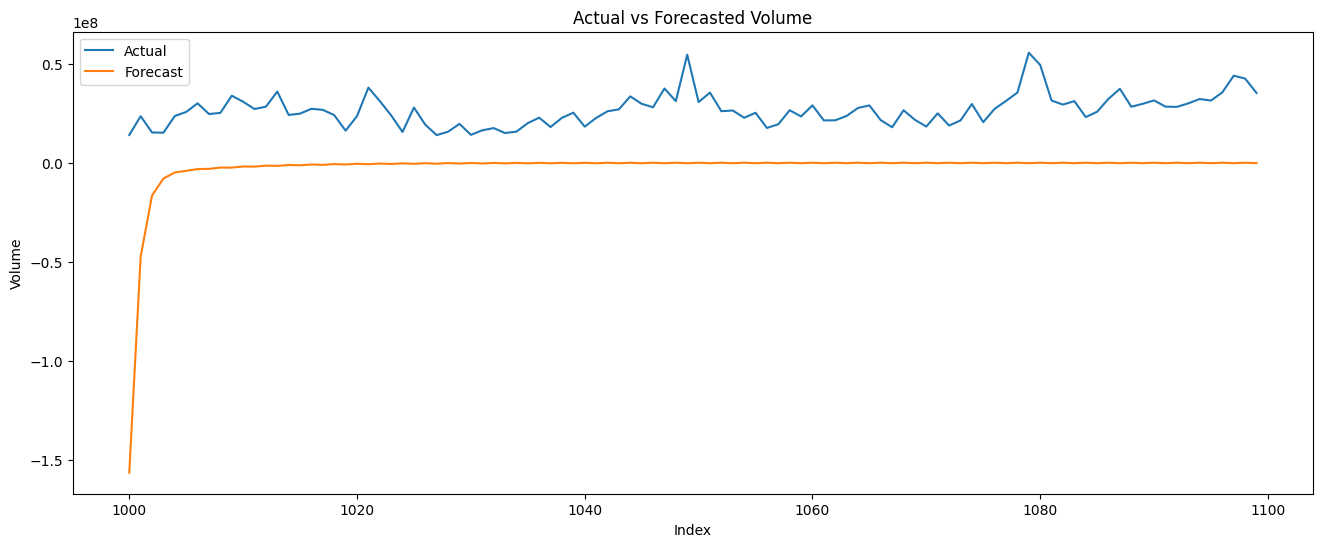

In [ ]:
# Generate forecasts
forecast = result.get_forecast(steps=100)  # Forecasting for 100 time steps

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Plot the actual data
actual_data = microsoft["Volume"].iloc[1000:1100].values  # Adjusted range to match the length of forecasted values
plt.plot(range(1000, 1100), actual_data, label='Actual')

# Plot the forecasted values
plt.plot(range(1000, 1100), forecast_values, label='Forecast')

# Set plot labels and legend
plt.xlabel('Index')
plt.ylabel('Volume')
plt.title('Actual vs Forecasted Volume')
plt.legend()

# Show the plot
plt.show()


In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 10107750.01179685.


ARMA model shows much better results than AR and MA models.

In [ ]:
# Predicting the Microsoft stocks volume
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from matplotlib import rcParams

# Set figure size
rcParams['figure.figsize'] = 16, 6

# Fit ARIMA model
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()

# Print model summary
print(result.summary())




                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9368
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -177130.289
Date:                Sun, 31 Mar 2024   AIC                         354266.578
Time:                        14:07:26   BIC                         354288.013
Sample:                             0   HQIC                        354273.857
                               - 9368                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8712      0.002   -433.307      0.000      -0.875      -0.867
ar.L2         -0.4342      0.003   -124.196      0.000      -0.441      -0.427
sigma2      1.558e+15        nan        nan        n

In [ ]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11925101.182221072.


Taking the slight lag into account, this is a fine model.

SARIMA models

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 4430
Model:                    local level   Log Likelihood              -18577.743
Date:                Sun, 31 Mar 2024   AIC                          37159.485
Time:                        14:08:17   BIC                          37172.277
Sample:                             0   HQIC                         37163.996
                               - 4430                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   256.8837      1.582    162.345      0.000     253.782     259.985
sigma2.level         0.0004      0.000      1.344      0.179      -0.000       0.001
Ljung-Box (L1) (Q):         

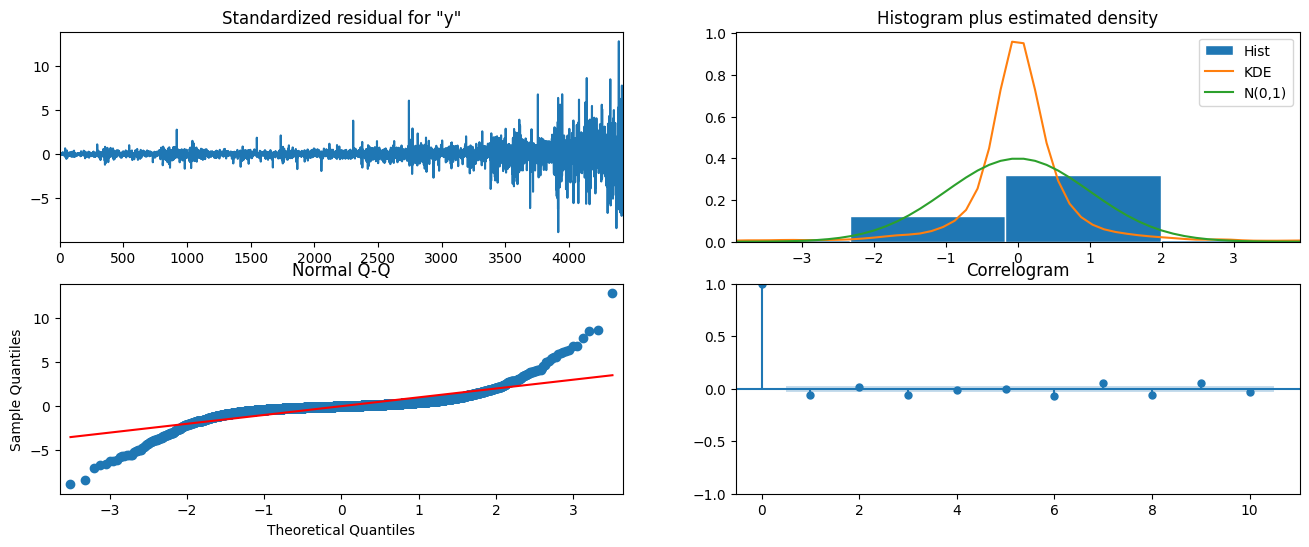

In [ ]:
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

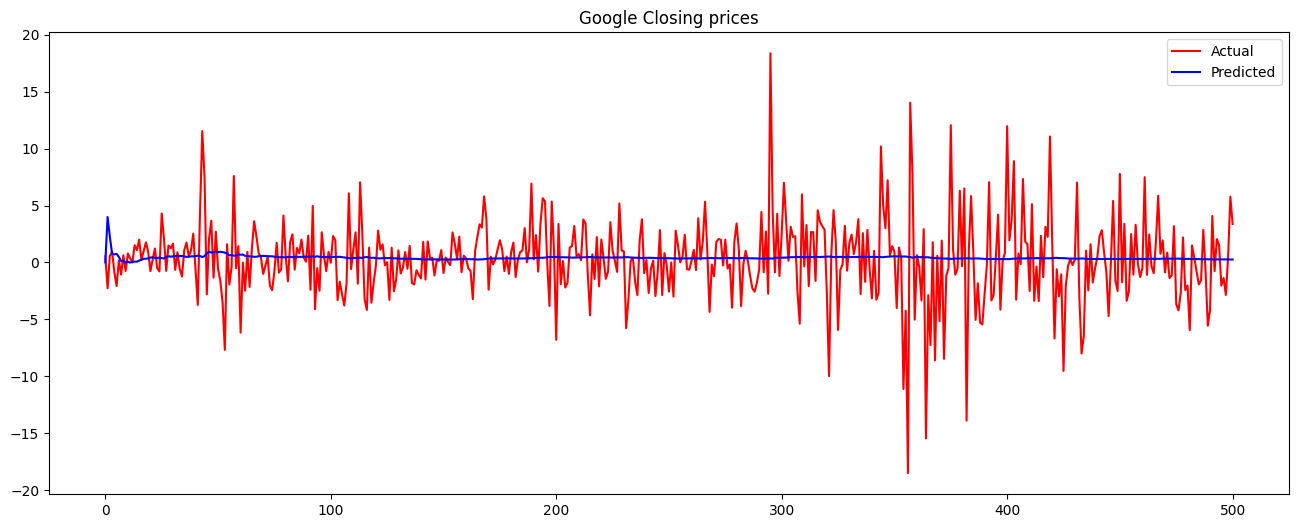

In [ ]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

Conclusion - Successfully implemented the basics of Time Series Analysis